# Water Quality Prediction - EDA

### Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

AttributeError: module 'numpy.random' has no attribute 'BitGenerator'

In [46]:
df = pd.read_csv('water_potability.csv')

In [47]:
df.shape

(3276, 10)

The dataset consists of 3276 rows and 10 columns

In [48]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [49]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [50]:
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1681,7.460148,221.343209,25480.918410,6.926943,NaN,438.619635,13.089086,58.083993,2.413629,0
2990,5.143587,180.382619,32740.564661,7.988893,328.437430,389.242148,13.943183,NaN,3.096164,0
533,5.389846,163.344352,19646.233419,9.092721,314.237577,491.750448,15.496325,48.686584,3.577675,0
1932,7.185276,212.483172,25645.067233,8.142513,352.869165,435.282981,8.930242,75.600980,2.959154,1
2810,8.315268,229.757446,15077.850343,7.053503,NaN,446.954910,12.195094,77.523430,4.128525,1


### Data Cleaning

In [51]:
#Finding null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [52]:
#Dropping the null values
df = df.dropna()

In [53]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [55]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [56]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [57]:
#Finding the datatypes of the columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Data Analysis and Visualization

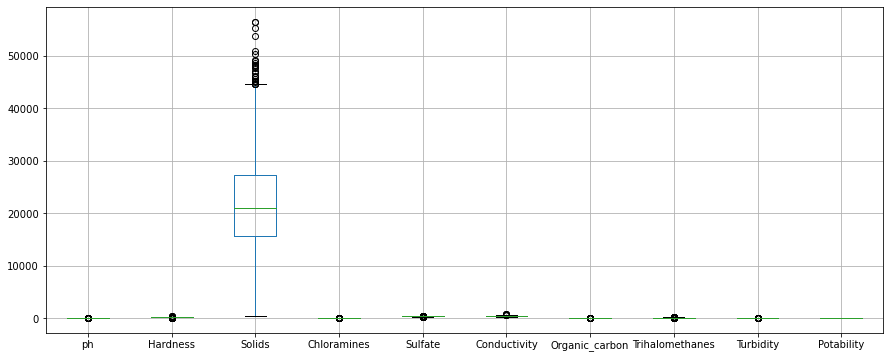

In [58]:
#Checking for the Outliers
df.boxplot(figsize = (15,6))
plt.show()

Not removing the outliers beacuse they may be important in deciding the quality of the water.

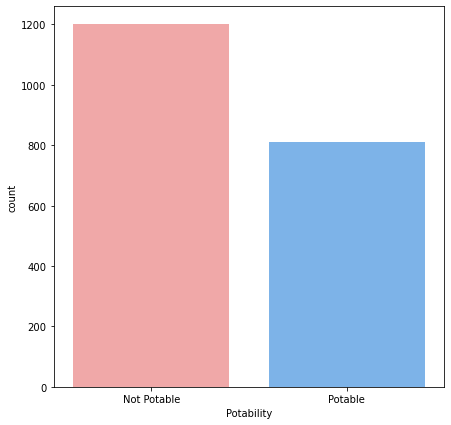

In [59]:
#Plotting the count for the potability column
colors = ["#ff9999", "#66b3ff"]
ax = sns.countplot(x="Potability", data=df, palette=colors, saturation=0.7)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [60]:
#plotting the distribution of the water
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

C:\Users\bhima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\bhima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Potability', ylabel='ph'>

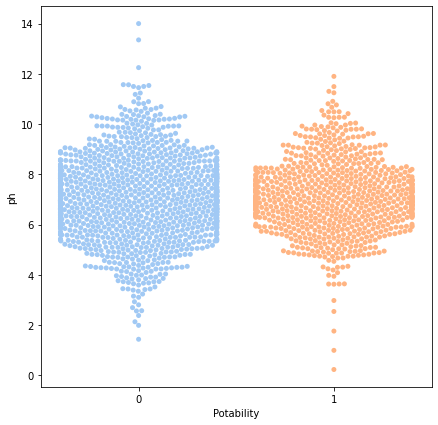

In [61]:
#Finding the potability of the water according to the ph value
sns.swarmplot(x='Potability', y='ph', data=df, palette='pastel')

<AxesSubplot:>

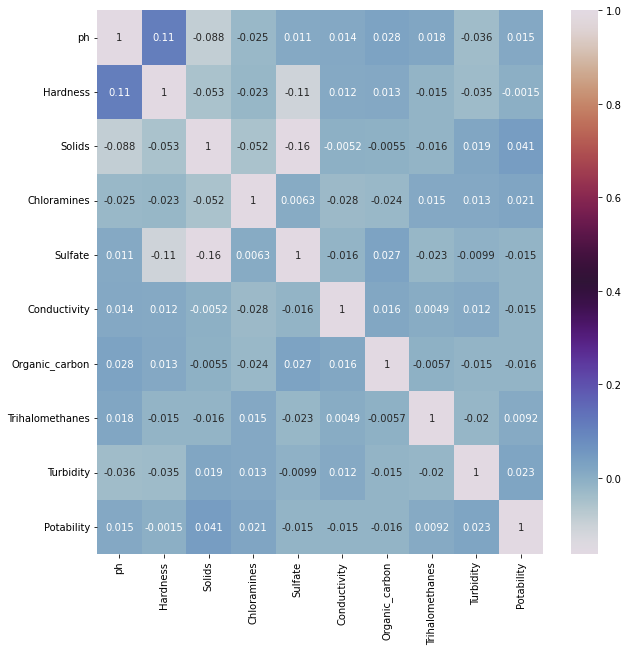

In [62]:
#Plotting the correlation between Potability and other  factors afftecing it
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot= True, cmap='twilight')

The Potability column of this dataset is the column, we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. 

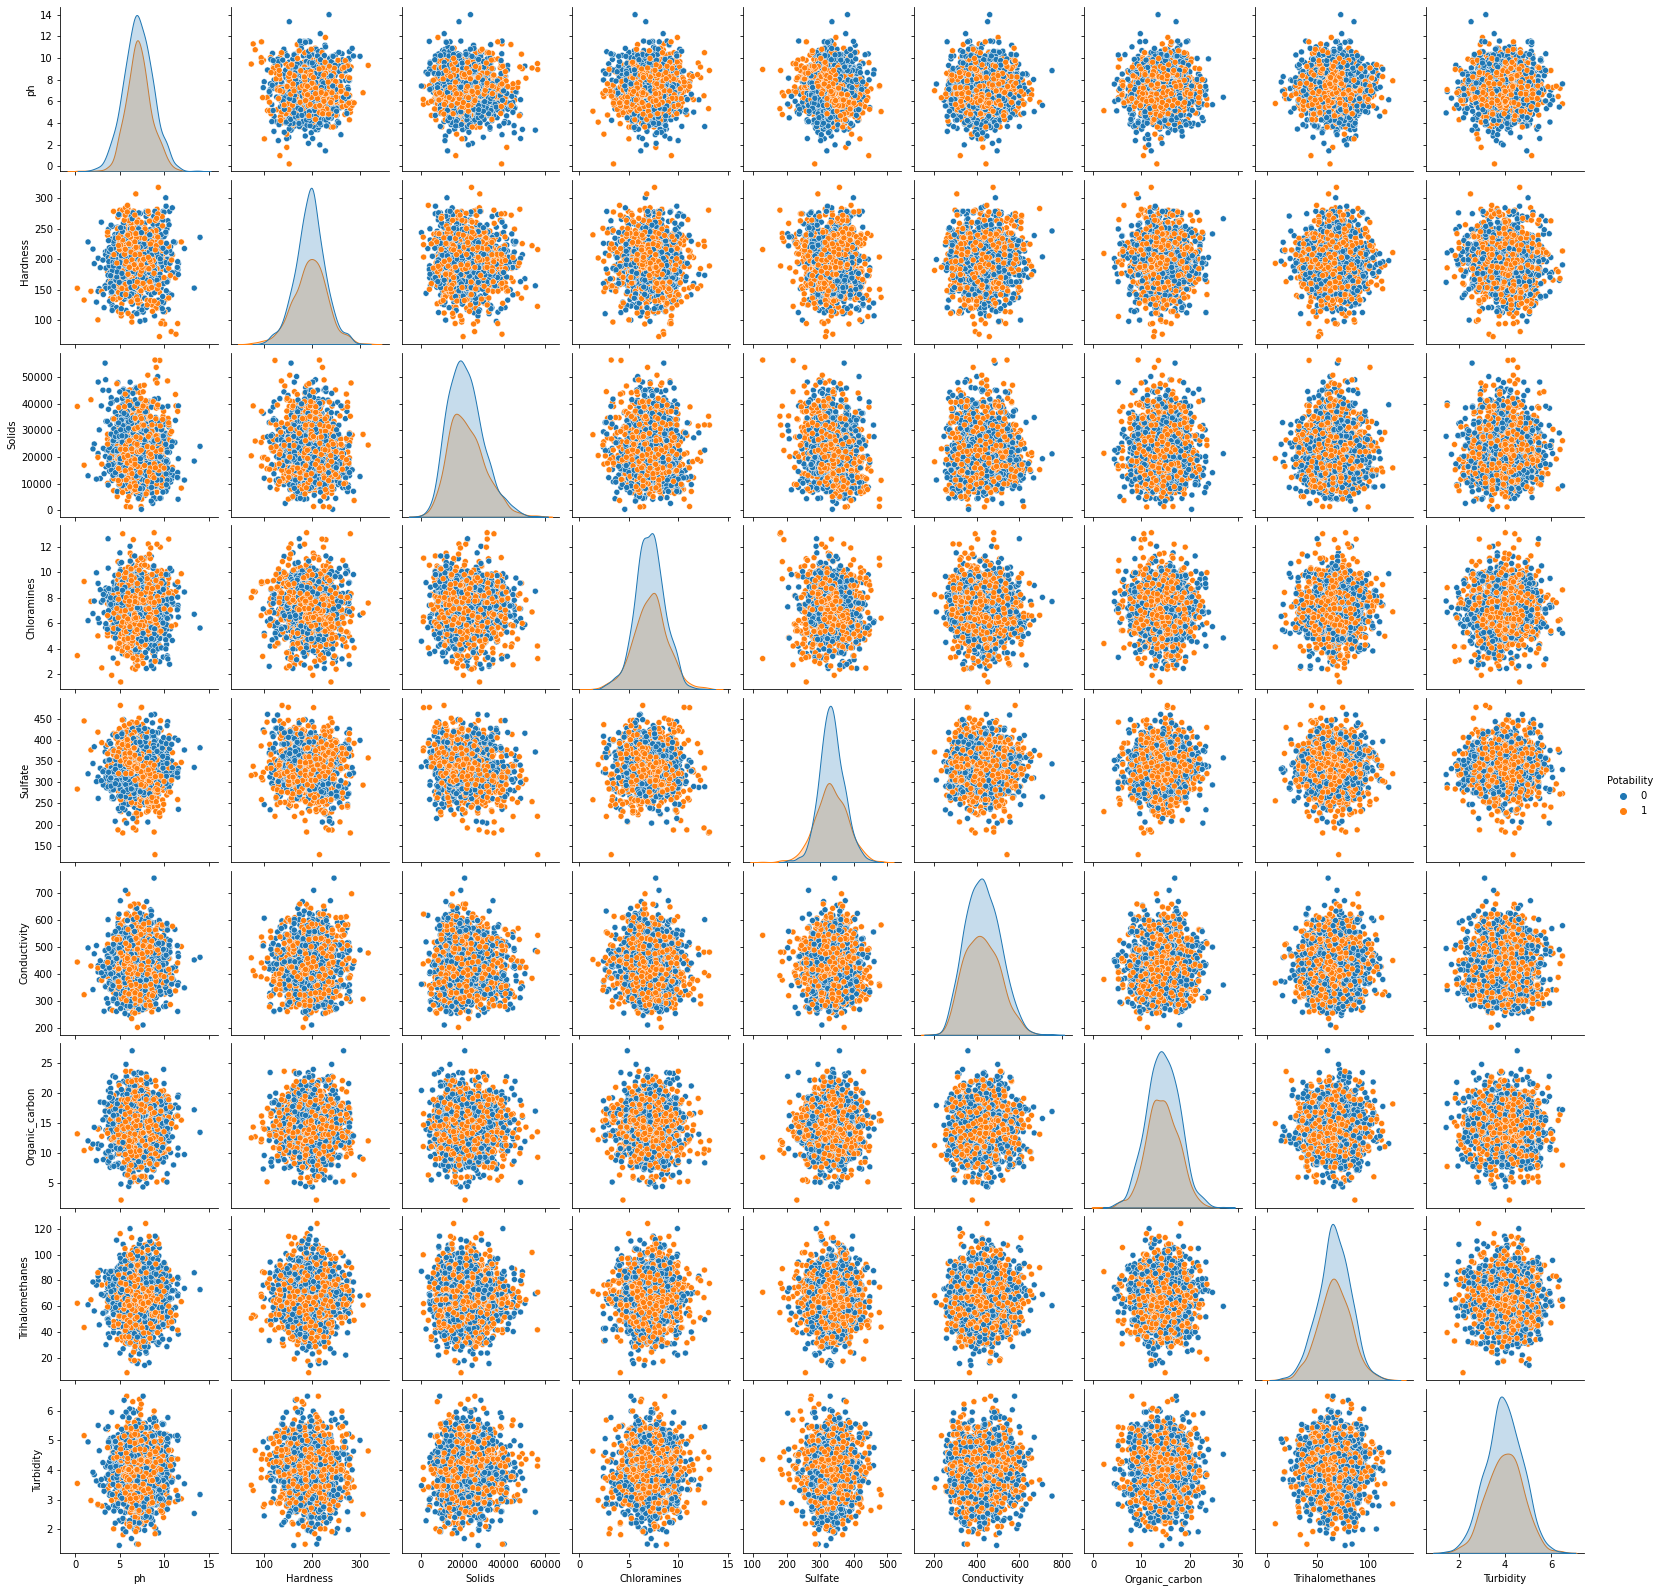

In [63]:
sns.pairplot(df, hue="Potability")

This is normal distribution

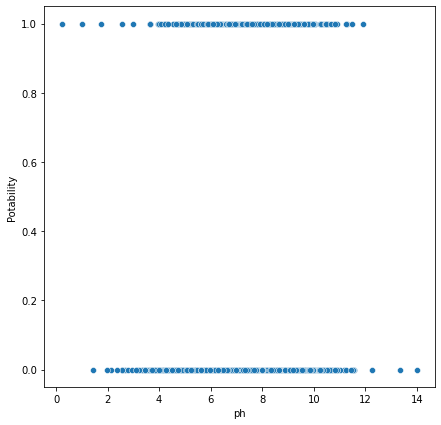

In [64]:
sns.scatterplot(x = df['ph'], y = df['Potability'])
plt.show()

For more ph values, the water quality is good and once it goes over 12 the water is not suitable for drinking

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

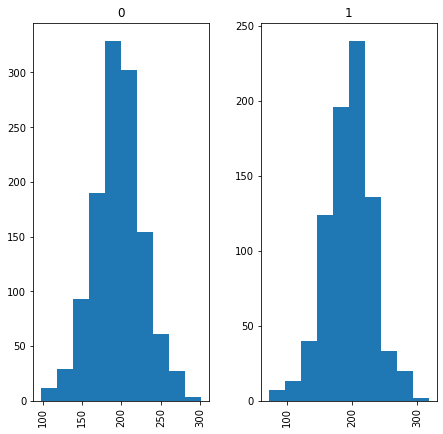

In [65]:
#Plotting the factors affecting the potability of the water
df.hist(column='Hardness', by='Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

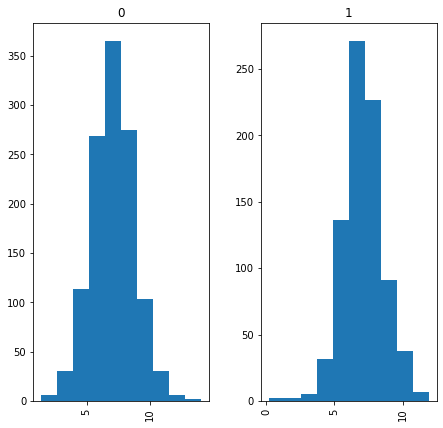

In [66]:
df.hist(column='ph', by='Potability')

C:\Users\bhima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Potability', ylabel='Density'>

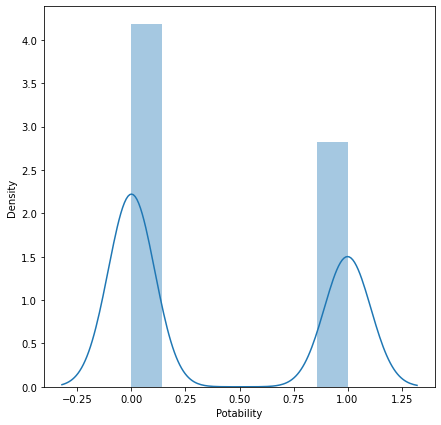

In [67]:
plt.rcParams['figure.figsize'] = [7,7]
sns.distplot(df['Potability'])

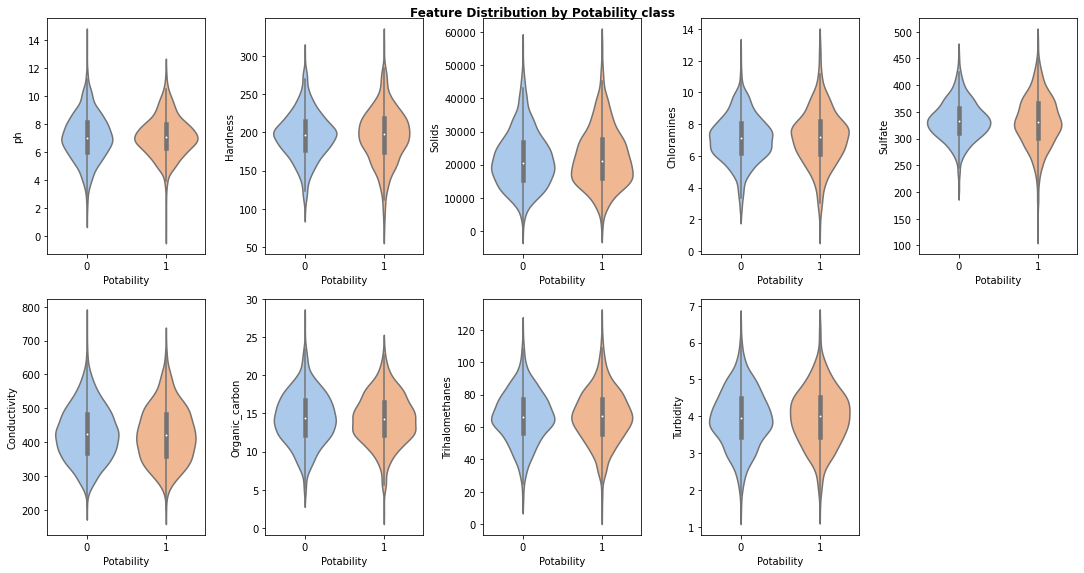

In [68]:
plt.figure(figsize=(15, 8))
plt.suptitle('Feature Distribution by Potability class', weight = 'bold')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(x='Potability', y=col, data=df, palette='pastel')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)
plt.show()

We can clearly see the difference in the water classification. Distribution of non potable water is high on conductivity,Turbidity and Trihalomethanes.

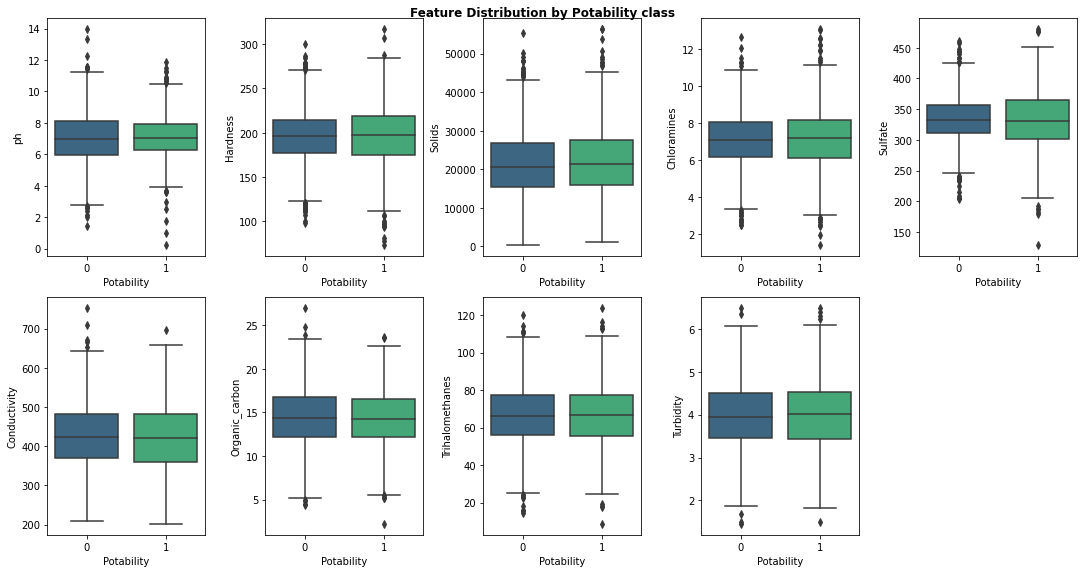

In [69]:
plt.figure(figsize=(15, 8))
plt.suptitle('Feature Distribution by Potability class', weight = 'bold')
for i, col in enumerate(df.columns[:-1]):
    
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='Potability', y=col, data=df, palette='viridis')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)
plt.show()

In [70]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[[0 1]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
[[308   1]
 [187   7]]
Accuracy: 0.63


In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]
[[229  80]
 [ 94 100]]
Accuracy: 0.65


In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[[0 1]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
[[277  32]
 [118  76]]
Accuracy: 0.70


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.90      0.79       309
           1       0.70      0.39      0.50       194

    accuracy                           0.70       503
   macro avg       0.70      0.64      0.65       503
weighted avg       0.70      0.70      0.68       503



In [34]:
from sklearn.svm import SVC
classifier = SVC(C=5.0,kernel = 'rbf', random_state = 42,gamma='scale',probability = True, shrinking=True,decision_function_shape = 'ovr',tol = 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[[0 1]
 [0 1]
 [1 0]
 ...
 [1 1]
 [0 0]
 [0 0]]
[[256  53]
 [ 92 102]]
Accuracy: 0.71


In [27]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[[0 1]
 [0 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]
[[253  56]
 [116  78]]
Accuracy: 0.66


Out of all the classification techniques used, Support Vector Classification gives you the highest accuracy.